In [1]:
from AC_modules.Constructor import *
from Utils import A3C_training
from importlib import reload

In [2]:
# Variable parameters
X = 5
Y = 5
initial = [0,0]
goal = [4,4]
MAX_STEPS = 100

game_params = dict(x=X, y=Y, initial=initial, goal=goal, max_steps=MAX_STEPS, 
                   greyscale_state=True, return_ohe=True)

In [3]:
relational_HPs = torch.load("Results/Sandbox/Supervised/best_HP_S_chosen-residual_UMUT")
relational_HPs['n_features'] = 16 # reduce because otherwise it crashes
relational_HPs

{'n_kernels': 36,
 'n_features': 16,
 'n_heads': 1,
 'n_attn_modules': 2,
 'feature_hidden_dim': 16,
 'feature_n_residuals': 1}

In [4]:
name = "OheNet"
action_space = 4
#n_features = 16

#HPs = dict(gamma=0.99, tau=0.3, n_steps=5, H=1e-3, **relational_HPs)
HPs = dict(gamma=0.99, tau=0.3, n_steps=5, H=1e-3, n_features=32, map_size=X)
learning_rate = 5e-3

#if torch.cuda.is_available():
#    HPs['device'] = 'cuda'
#else:
HPs['device'] = 'cpu'
    
print("Using device "+HPs['device'])
agent_constructor = ActorCriticConstructor(name, False, action_space, **HPs)

Using device cpu
Model:  <class 'AC_modules.Networks.OheNet'>
self.model:  <class 'AC_modules.Networks.OheNet'>
self.shared:  False
self.args:  (4,)
self.kwargs:  {'gamma': 0.99, 'tau': 0.3, 'n_steps': 5, 'H': 0.001, 'n_features': 32, 'map_size': 5, 'device': 'cpu'}


In [5]:
reload(A3C_training)

<module 'Utils.A3C_training' from '/m/home/home9/94/dainesn1/unix/Workdir/RelationalDeepRL/Utils/A3C_training.py'>

In [6]:
%%time
results = A3C_training.train_sandbox(agent_constructor, learning_rate, game_params, n_training_threads=11, n_episodes=1000,
                  max_steps=MAX_STEPS, return_agent=True, random_init=True)

Test process started
Process 1 started
Process 4 started
Process 3 started
Process 6 started
Process 2 started
Process 7 started
Process 5 started
Process 8 started
Process 10 started
Process 9 started
Process 11 started
All processes started
Test 2 - reward 1.00 - steps to solve 31.00
Test 3 - reward 0.00 - steps to solve 100.00
Test 4 - reward 0.00 - steps to solve 100.00
Test 5 - reward 0.00 - steps to solve 100.00
Test 6 - reward 0.00 - steps to solve 100.00
Test 7 - reward 0.00 - steps to solve 100.00
Test 8 - reward 0.00 - steps to solve 100.00
Episode 10 of process 7 - reward: 0.30 - steps to solve: 71.20
Episode 10 of process 10 - reward: 0.30 - steps to solve: 76.10
Test 9 - reward 0.00 - steps to solve 100.00
Episode 10 of process 4 - reward: 0.20 - steps to solve: 81.30
Episode 10 of process 5 - reward: 0.30 - steps to solve: 84.50
Test 10 - reward 0.00 - steps to solve 100.00
Episode 10 of process 1 - reward: 0.20 - steps to solve: 87.30
Episode 10 of process 3 - reward: 0.

Process Process-1:
Process Process-8:
Process Process-6:
Process Process-4:
Process Process-5:
Process Process-9:
Traceback (most recent call last):
  File "/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generi

  File "/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/site-packages/torch/nn/modules/module.py", line 541, in __call__
    result = self.forward(*input, **kwargs)
  File "/m/home/home9/94/dainesn1/unix/Workdir/RelationalDeepRL/AC_modules/ActorCriticArchitecture.py", line 15, in forward
    log_probs = F.log_softmax(self.net(state), dim=1)
  File "/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/site-packages/torch/nn/modules/module.py", line 541, in __call__
    result = self.forward(*input, **kwargs)
Process Process-11:
  File "/m/home/home9/94/dainesn1/unix/Workdir/RelationalDeepRL/AC_modules/Networks.py", line 285, in forward
    x = self.OHE_conv(x)
  File "/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/site-packages/torch/nn/modules/module.py", line 541, in __call__
    re

  File "/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/site-packages/torch/nn/modules/module.py", line 541, in __call__
    result = self.forward(*input, **kwargs)
  File "/m/home/home9/94/dainesn1/unix/Workdir/RelationalDeepRL/AC_modules/Layers.py", line 67, in forward
    x = self.net(x)
  File "/m/home/home9/94/dainesn1/unix/Workdir/RelationalDeepRL/Utils/A3C_training.py", line 122, in training_thread
    loss.backward()
  File "/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/site-packages/torch/nn/modules/container.py", line 92, in forward
    input = module(input)
  File "/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/site-packages/torch/tensor.py", line 166, in backward
    torch.autograd.backward(self, gradient, retain_graph, create_graph)
  File "/m/work/modules/automat

KeyboardInterrupt: 

Process Process-7:
Traceback (most recent call last):
  File "/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/m/home/home9/94/dainesn1/unix/Workdir/RelationalDeepRL/Utils/A3C_training.py", line 122, in training_thread
    loss.backward()
  File "/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/site-packages/torch/tensor.py", line 166, in backward
    torch.autograd.backward(self, gradient, retain_graph, create_graph)
  File "/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/site-packages/torch/

In [9]:
score, global_model, losses, steps_to_solve = results

In [10]:
import matplotlib.pyplot as plt

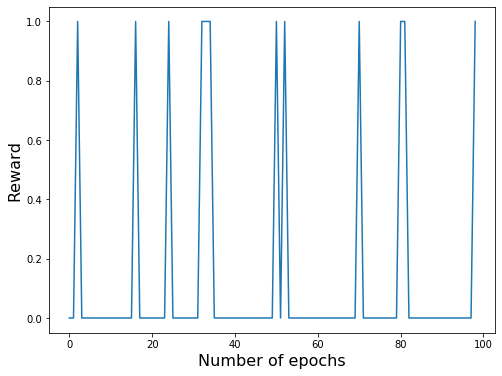

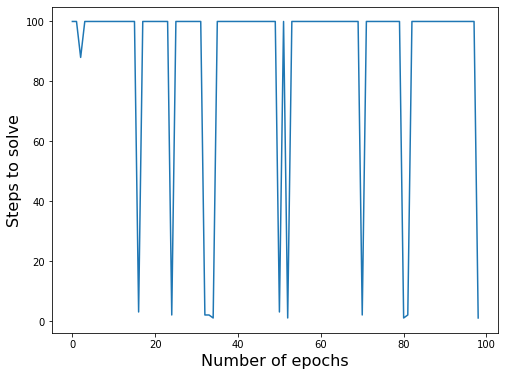

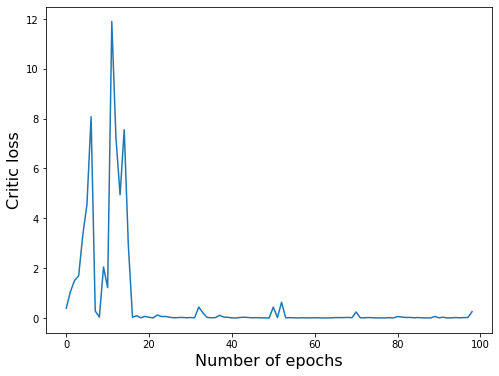

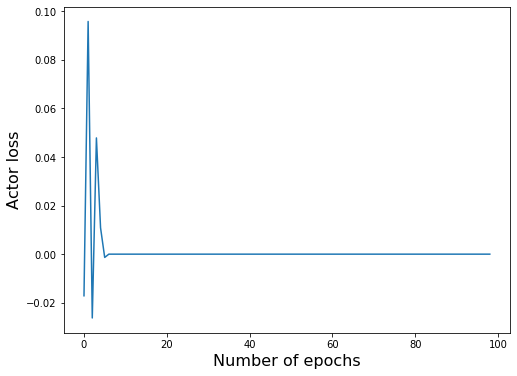

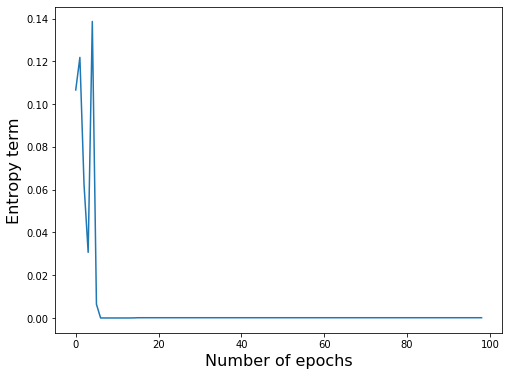

In [11]:
moving_average=False
average_window=100

if moving_average:
    n_epochs = np.arange(average_window, len(score))
else:
    n_epochs = np.arange(len(score))

### plot score ###
plt.figure(figsize=(8,6))

if moving_average:
    average_score = np.array([np.mean(score[i:i+average_window]) for i in range(len(n_epochs))])
    plt.plot(n_epochs, average_score)
else:
    plt.plot(n_epochs, score)
plt.xlabel("Number of epochs", fontsize=16)
plt.ylabel("Reward", fontsize=16)
plt.show()

### steps to solve ###
plt.figure(figsize=(8,6))

if moving_average:
    average_score = np.array([np.mean(steps_to_solve[i:i+average_window]) for i in range(len(n_epochs))])
    plt.plot(n_epochs, average_score)
else:
    plt.plot(n_epochs, steps_to_solve)
plt.xlabel("Number of epochs", fontsize=16)
plt.ylabel("Steps to solve", fontsize=16)
plt.show()

### plot critic loss ###
plt.figure(figsize=(8,6))

if moving_average:
    average_score = np.array([np.mean(losses['critic_losses'][i:i+average_window]) for i in range(len(n_epochs))])
    plt.plot(n_epochs, average_score)
else:
    plt.plot(n_epochs, losses['critic_losses'])

plt.xlabel("Number of epochs", fontsize=16)
plt.ylabel("Critic loss", fontsize=16)
plt.show()

### plot actor loss ###
plt.figure(figsize=(8,6))

if moving_average:
    average_score = np.array([np.mean(losses['actor_losses'][i:i+average_window]) for i in range(len(n_epochs))])
    plt.plot(n_epochs, average_score)
else:
    plt.plot(n_epochs, losses['actor_losses'])

plt.xlabel("Number of epochs", fontsize=16)
plt.ylabel("Actor loss", fontsize=16)
plt.show()

### plot entropy ###
plt.figure(figsize=(8,6))

if moving_average:
    average_score = np.array([np.mean(losses['entropies'][i:i+average_window]) for i in range(len(n_epochs))])
    plt.plot(n_epochs, -average_score)
else:
    plt.plot(n_epochs, -np.array(losses['entropies']))

plt.xlabel("Number of epochs", fontsize=16)
plt.ylabel("Entropy term", fontsize=16)
plt.show()

In [7]:
import torch.multiprocessing as mp

In [27]:
help(mp.Queue().get )

Help on method get in module multiprocessing.queues:

get(block=True, timeout=None) method of multiprocessing.queues.Queue instance



In [9]:
q = mp.Queue()
q.put(1, block=False)

In [10]:
q.get()

1

In [25]:
import time

def wait_and_put(q):
    time.sleep(60)
    q.put([np.arange(1000000)])

In [26]:
q = mp.Queue()
p = mp.Process(target=wait_and_put, args=(q,))
p.start()
result = q.get()
print(result)
p.join()

[array([     0,      1,      2, ..., 999997, 999998, 999999])]


In [2]:
import numpy as np

In [3]:
np.random.seed()

In [4]:
np.random.randint(10000)

8036